DBSCAN es un modelo de clustering (agrupar datos) para aprendizaje no supervisado (con datos no etiquetados) basado en densidad, es decir, un cluster (grupo) es una región densa de puntos seárada por regiones poco densas de otras regiones densas. Es útil cuando los cluster tienes formas irregulares, están entrelazados o hay ruido en los datos.
Considera qué tan próximo está una muestra de otra según dos parámetros: 
* epsilon (eps): Densidad, número de puntos en un radio especifico
* minPts (min_samples): Un punto es core (puntos interiores de un cluster) si tinene, al menos, un número mínimo de puntos minPts en su vecindario de radio epsilon.


In [43]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

In [25]:
X, y = make_moons(n_samples=300, noise=.05)

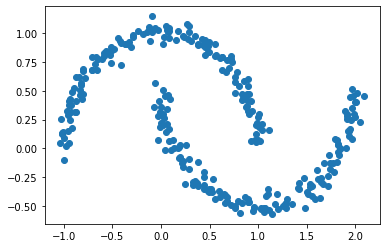

In [26]:
plt.scatter(X[:,0], X[:,1])

En este caso los datos tienen una forma irregular, por lo que usar DBSCAN es una buena alternativa, frente a por ej., k-means

In [57]:
db = DBSCAN(eps=0.2, min_samples=3).fit(X)

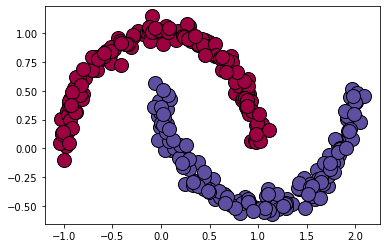

In [59]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.show()

Como se puede ver en el grafico de arriba, DBSCAN agrupó correctamente cada punto en cada uno de los dos clusters que se forman

In [60]:
y == labels

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,